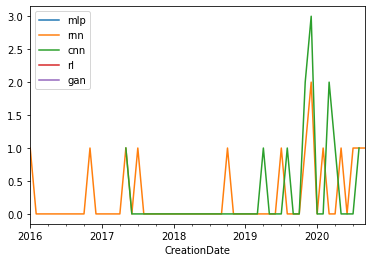

In [1]:
import re
import pandas as pd
import preprocess.pre as pre
df = pd.read_csv('../data/speech.csv')
df.drop(['PostTypeId', 'ParentId', 'OwnerUserId', 'OwnerDisplayName','LastEditorUserId', 'LastEditorDisplayName', 'AcceptedAnswerId', 'Score',
       'ViewCount', 'AnswerCount', 'CommentCount', 'FavoriteCount'],axis=1,inplace=True)

df['MLP'] = False
df['RNN'] = False
df['CNN'] = False
df['RL'] = False
df['GAN'] = False
df['keras'] = False
df['tf'] = False
df['torch'] = False

def isMLP(str):
    a = re.search(r'\b(mlp|multiple layer|multilayer perceptron|non linear activation)\b', str)
    if a is None:
        return False
    else:
        return True
def isRNN(str):
    a = re.search(r'\b(rnn|recurrent-neural-network|recurrent neural network|lstm|fully recurrent|elman network'
                  r'|jordan network|hopfield|echo state|recursive neural network|gru|esn|neural turing machine'
                  r'|memory network)\b',str)
    if a is None:
        return False
    else:
        return True
def isCNN(str):
    a = re.search(r'\b(cnn|conv-neural-network|convolution|convnet|convolutional neural network|receptive field'
                  r'|shift invariant|lenet|alexnet|googlenet|vgg-net|vgg|zf net|resnet|rcnn)\b',str)
    if a is None:
        return False
    else:
        return True
def isRL(str):
    a = re.search(r'\b(reinforcement-learning|reinforcement learning|montecarlo|monte carlo|q-learning|q learning'
                  r'|sarsa|dqn|ddpg|a3c|trpo|ppo|td|sac|transfer-learning|transfer learning)\b',str)
    if a is None:
        return False
    else:
        return True
def isGAN(str):
    a = re.search(r'\b(generative-adversarial-network|generative adversarial network|gans|gan|stylegan)\b',str)
    if a is None:
        return False
    else:
        return True
def isKeras(str):
    a = re.search(r'\b(keras|kera)\b',str)
    if a is None:
        return False
    else:
        return True
def isTF(str):
    a = re.search(r'\b(tensorflow|tf)\b',str)
    if a is None:
        return False
    else:
        return True
def isTorch(str):
    a = re.search(r'\b(pytorch|torch)\b',str)
    if a is None:
        return False
    else:
        return True

for index, row in df.iterrows():
    title = str(row['Title'])
    tags = str(row['Tags'])
    body = str(row['Body'])
    title = pre.processbody(title)
    # print(title)
    body = pre.processbody(body)
    tags = pre.preprocesstag(tags)
    df.at[index, 'MLP'] = isMLP(title)|isMLP(body)|isMLP(tags)
    df.at[index, 'RNN'] = isRNN(title)|isRNN(body)|isRNN(tags)
    df.at[index, 'CNN'] = isCNN(title)|isCNN(body)|isCNN(tags)
    df.at[index, 'RL'] = isRL(title)|isRL(body)|isRL(tags)
    df.at[index, 'GAN'] = isGAN(title)|isGAN(body)|isGAN(tags)
    df.at[index, 'keras'] = isKeras(title)|isKeras(body)|isKeras(tags)
    df.at[index, 'tf'] = isTF(title)|isTF(body)|isTF(tags)
    df.at[index, 'torch'] = isTorch(title)|isTorch(body)|isTorch(tags)

#按月统计
#keras-nlp
kerasmonth = df[df['keras'] == True]
kerasmlp = kerasmonth[kerasmonth['MLP']==True]
kerasrnn = kerasmonth[kerasmonth['RNN']==True]
kerascnn = kerasmonth[kerasmonth['CNN']==True]
kerasrl = kerasmonth[kerasmonth['RL']==True]
kerasgan = kerasmonth[kerasmonth['GAN']==True]

kerasmlp = kerasmlp[['Id','CreationDate']]
kerasmlp['CreationDate'] = pd.to_datetime(kerasmlp['CreationDate'])
kerasmlp = kerasmlp.set_index('CreationDate')
kerasmlp = kerasmlp.resample('M').count().to_period('M')
kerasmlp.rename(columns={'Id':'mlp'},inplace = True)

kerasrnn = kerasrnn[['Id','CreationDate']]
kerasrnn['CreationDate'] = pd.to_datetime(kerasrnn['CreationDate'])
kerasrnn = kerasrnn.set_index('CreationDate')
kerasrnn = kerasrnn.resample('M').count().to_period('M')
kerasrnn.rename(columns={'Id':'rnn'},inplace = True)

kerascnn = kerascnn[['Id','CreationDate']]
kerascnn['CreationDate'] = pd.to_datetime(kerascnn['CreationDate'])
kerascnn = kerascnn.set_index('CreationDate')
kerascnn = kerascnn.resample('M').count().to_period('M')
kerascnn.rename(columns={'Id':'cnn'},inplace = True)

kerasrl = kerasrl[['Id','CreationDate']]
kerasrl['CreationDate'] = pd.to_datetime(kerasrl['CreationDate'])
kerasrl = kerasrl.set_index('CreationDate')
kerasrl = kerasrl.resample('M').count().to_period('M')
kerasrl.rename(columns={'Id':'rl'},inplace = True)

kerasgan = kerasgan[['Id','CreationDate']]
kerasgan['CreationDate'] = pd.to_datetime(kerasgan['CreationDate'])
kerasgan = kerasgan.set_index('CreationDate')
kerasgan = kerasgan.resample('M').count().to_period('M')
kerasgan.rename(columns={'Id':'gan'},inplace = True)

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

import matplotlib.pyplot as plt
keras = pd.concat([kerasmlp, kerasrnn, kerascnn, kerasrl, kerasgan],axis=1)
keras.plot()
plt.savefig('../picture/speech/keras-speech.png')

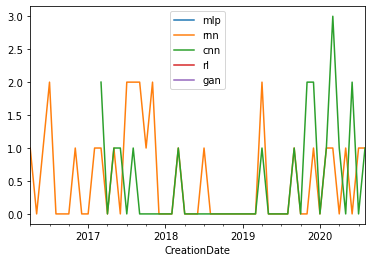

In [2]:
#tf-nlp
tfmonth = df[df['tf'] == True]
tfmlp = tfmonth[tfmonth['MLP']==True]
tfrnn = tfmonth[tfmonth['RNN']==True]
tfcnn = tfmonth[tfmonth['CNN']==True]
tfrl = tfmonth[tfmonth['RL']==True]
tfgan = tfmonth[tfmonth['GAN']==True]

tfmlp = tfmlp[['Id','CreationDate']]
tfmlp['CreationDate'] = pd.to_datetime(tfmlp['CreationDate'])
tfmlp = tfmlp.set_index('CreationDate')
tfmlp = tfmlp.resample('M').count().to_period('M')
tfmlp.rename(columns={'Id':'mlp'},inplace = True)

tfrnn = tfrnn[['Id','CreationDate']]
tfrnn['CreationDate'] = pd.to_datetime(tfrnn['CreationDate'])
tfrnn = tfrnn.set_index('CreationDate')
tfrnn = tfrnn.resample('M').count().to_period('M')
tfrnn.rename(columns={'Id':'rnn'},inplace = True)

tfcnn = tfcnn[['Id','CreationDate']]
tfcnn['CreationDate'] = pd.to_datetime(tfcnn['CreationDate'])
tfcnn = tfcnn.set_index('CreationDate')
tfcnn = tfcnn.resample('M').count().to_period('M')
tfcnn.rename(columns={'Id':'cnn'},inplace = True)

tfrl = tfrl[['Id','CreationDate']]
tfrl['CreationDate'] = pd.to_datetime(tfrl['CreationDate'])
tfrl = tfrl.set_index('CreationDate')
tfrl = tfrl.resample('M').count().to_period('M')
tfrl.rename(columns={'Id':'rl'},inplace = True)

tfgan = tfgan[['Id','CreationDate']]
tfgan['CreationDate'] = pd.to_datetime(tfgan['CreationDate'])
tfgan = tfgan.set_index('CreationDate')
tfgan = tfgan.resample('M').count().to_period('M')
tfgan.rename(columns={'Id':'gan'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

tf = pd.concat([tfmlp, tfrnn, tfcnn, tfrl, tfgan],axis=1)
tf.plot()
plt.savefig('../picture/speech/tf-speech.png')

D:\anaconda3\envs\lda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1136: UserWarning: Attempting to set identical left == right == 607.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
D:\anaconda3\envs\lda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1136: UserWarning: Attempting to set identical left == right == 607.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
D:\anaconda3\envs\lda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1136: UserWarning: Attempting to set identical left == right == 607.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
D:\anaconda3\envs\lda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1136: UserWarning: Attempting to set identical left == right == 607.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
D:\anaconda3\envs\lda\lib\site-packages\pandas\plotting\_mat

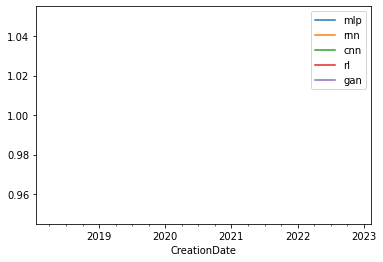

In [3]:
#torch-nlp
torchmonth = df[df['torch'] == True]
torchmlp = torchmonth[torchmonth['MLP']==True]
torchrnn = torchmonth[torchmonth['RNN']==True]
torchcnn = torchmonth[torchmonth['CNN']==True]
torchrl = torchmonth[torchmonth['RL']==True]
torchgan = torchmonth[torchmonth['GAN']==True]

torchmlp = torchmlp[['Id','CreationDate']]
torchmlp['CreationDate'] = pd.to_datetime(torchmlp['CreationDate'])
torchmlp = torchmlp.set_index('CreationDate')
torchmlp = torchmlp.resample('M').count().to_period('M')
torchmlp.rename(columns={'Id':'mlp'},inplace = True)

torchrnn = torchrnn[['Id','CreationDate']]
torchrnn['CreationDate'] = pd.to_datetime(torchrnn['CreationDate'])
torchrnn = torchrnn.set_index('CreationDate')
torchrnn = torchrnn.resample('M').count().to_period('M')
torchrnn.rename(columns={'Id':'rnn'},inplace = True)

torchcnn = torchcnn[['Id','CreationDate']]
torchcnn['CreationDate'] = pd.to_datetime(torchcnn['CreationDate'])
torchcnn = torchcnn.set_index('CreationDate')
torchcnn = torchcnn.resample('M').count().to_period('M')
torchcnn.rename(columns={'Id':'cnn'},inplace = True)

torchrl = torchrl[['Id','CreationDate']]
torchrl['CreationDate'] = pd.to_datetime(torchrl['CreationDate'])
torchrl = torchrl.set_index('CreationDate')
torchrl = torchrl.resample('M').count().to_period('M')
torchrl.rename(columns={'Id':'rl'},inplace = True)

torchgan = torchgan[['Id','CreationDate']]
torchgan['CreationDate'] = pd.to_datetime(torchgan['CreationDate'])
torchgan = torchgan.set_index('CreationDate')
torchgan = torchgan.resample('M').count().to_period('M')
torchgan.rename(columns={'Id':'gan'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

torch = pd.concat([torchmlp, torchrnn, torchcnn, torchrl, torchgan],axis=1)
torch.plot()
plt.savefig('../picture/speech/torch-speech.png')

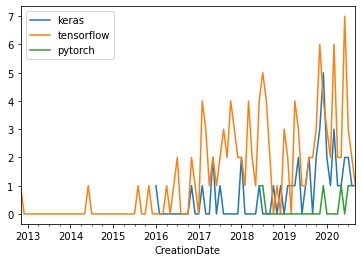

In [4]:
nlp = pd.concat([kerasmonth, tfmonth, torchmonth], axis=1)
nlp.plot()
plt.savefig('../picture/speech/speech-frameworks.png')

ValueError: zero-size array to reduction operation fmin which has no identity

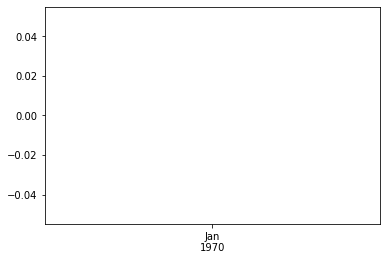

In [6]:
mlpmonth = df[df['MLP'] == True]
kerasmonth = mlpmonth[mlpmonth['keras']==True]
tfmonth = mlpmonth[mlpmonth['tf']==True]
torchmonth = mlpmonth[mlpmonth['torch']==True]

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

mlpmonth = mlpmonth[['Id','CreationDate']]
mlpmonth['CreationDate'] = pd.to_datetime(mlpmonth['CreationDate'])
mlpmonth = mlpmonth.set_index('CreationDate')
mlpmonth = mlpmonth.resample('M').count().to_period('M')
mlpmonth.rename(columns={'Id':'mlp'},inplace = True)

mlp = pd.concat([kerasmonth, tfmonth, torchmonth],axis=1)
mlp.plot()
plt.savefig('../picture/speech/mlp-speech.png')

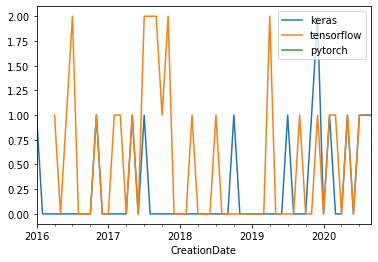

In [7]:
rnnmonth = df[df['RNN'] == True]
kerasmonth = rnnmonth[rnnmonth['keras']==True]
tfmonth = rnnmonth[rnnmonth['tf']==True]
torchmonth = rnnmonth[rnnmonth['torch']==True]

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

rnnmonth = rnnmonth[['Id','CreationDate']]
rnnmonth['CreationDate'] = pd.to_datetime(rnnmonth['CreationDate'])
rnnmonth = rnnmonth.set_index('CreationDate')
rnnmonth = rnnmonth.resample('M').count().to_period('M')
rnnmonth.rename(columns={'Id':'rnn'},inplace = True)

rnn = pd.concat([kerasmonth, tfmonth, torchmonth],axis=1)
rnn.plot()
plt.savefig('../picture/speech/rnn-speech.png')

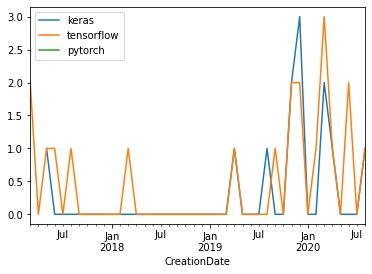

In [8]:
cnnmonth = df[df['CNN'] == True]
kerasmonth = cnnmonth[cnnmonth['keras']==True]
tfmonth = cnnmonth[cnnmonth['tf']==True]
torchmonth = cnnmonth[cnnmonth['torch']==True]

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

cnnmonth = cnnmonth[['Id','CreationDate']]
cnnmonth['CreationDate'] = pd.to_datetime(cnnmonth['CreationDate'])
cnnmonth = cnnmonth.set_index('CreationDate')
cnnmonth = cnnmonth.resample('M').count().to_period('M')
cnnmonth.rename(columns={'Id':'cnn'},inplace = True)

cnn = pd.concat([kerasmonth, tfmonth, torchmonth],axis=1)
cnn.plot()
plt.savefig('../picture/speech/cnn-speech.png')

ValueError: zero-size array to reduction operation fmin which has no identity

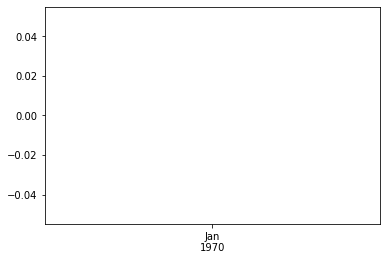

In [9]:
rlmonth = df[df['RL'] == True]
kerasmonth = rlmonth[rlmonth['keras']==True]
tfmonth = rlmonth[rlmonth['tf']==True]
torchmonth = rlmonth[rlmonth['torch']==True]

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

rlmonth = rlmonth[['Id','CreationDate']]
rlmonth['CreationDate'] = pd.to_datetime(rlmonth['CreationDate'])
rlmonth = rlmonth.set_index('CreationDate')
rlmonth = rlmonth.resample('M').count().to_period('M')
rlmonth.rename(columns={'Id':'rl'},inplace = True)

rl = pd.concat([kerasmonth, tfmonth, torchmonth],axis=1)
rl.plot()
plt.savefig('../picture/speech/rl-speech.png')

ValueError: zero-size array to reduction operation fmin which has no identity

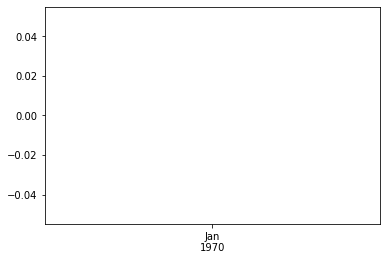

In [10]:
ganmonth = df[df['GAN'] == True]
kerasmonth = ganmonth[ganmonth['keras']==True]
tfmonth = ganmonth[ganmonth['tf']==True]
torchmonth = ganmonth[ganmonth['torch']==True]

kerasmonth = kerasmonth[['Id','CreationDate']]
kerasmonth['CreationDate'] = pd.to_datetime(kerasmonth['CreationDate'])
kerasmonth = kerasmonth.set_index('CreationDate')
kerasmonth = kerasmonth.resample('M').count().to_period('M')
kerasmonth.rename(columns={'Id':'keras'},inplace = True)

tfmonth = tfmonth[['Id','CreationDate']]
tfmonth['CreationDate'] = pd.to_datetime(tfmonth['CreationDate'])
tfmonth = tfmonth.set_index('CreationDate')
tfmonth = tfmonth.resample('M').count().to_period('M')
tfmonth.rename(columns={'Id':'tensorflow'},inplace = True)

torchmonth = torchmonth[['Id','CreationDate']]
torchmonth['CreationDate'] = pd.to_datetime(torchmonth['CreationDate'])
torchmonth = torchmonth.set_index('CreationDate')
torchmonth = torchmonth.resample('M').count().to_period('M')
torchmonth.rename(columns={'Id':'pytorch'},inplace = True)

ganmonth = ganmonth[['Id','CreationDate']]
ganmonth['CreationDate'] = pd.to_datetime(ganmonth['CreationDate'])
ganmonth = ganmonth.set_index('CreationDate')
ganmonth = ganmonth.resample('M').count().to_period('M')
ganmonth.rename(columns={'Id':'gan'},inplace = True)

gan = pd.concat([kerasmonth, tfmonth, torchmonth],axis=1)
gan.plot()
plt.savefig('../picture/speech/gan-speech.png')

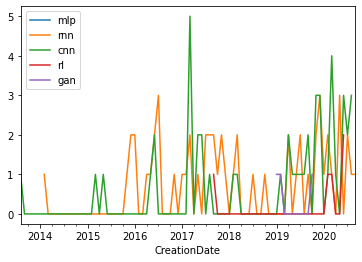

In [11]:
nlp = pd.concat([mlpmonth, rnnmonth, cnnmonth, rlmonth, ganmonth], axis=1)
nlp.plot()
plt.savefig('../picture/speech/speech-algorithm.png')